In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [3]:
import seaborn as sns
iris=sns.load_dataset("iris")

In [4]:
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,versicolor
97,6.2,2.9,4.3,1.3,versicolor
36,5.5,3.5,1.3,0.2,setosa


In [5]:
#Complete Iris dataset
encoder = LabelEncoder()
iris['species']= encoder.fit_transform(iris['species']) 

In [5]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,1
118,7.7,2.6,6.9,2.3,2
82,5.8,2.7,3.9,1.2,1
47,4.6,3.2,1.4,0.2,0
22,4.6,3.6,1.0,0.2,0
95,5.7,3.0,4.2,1.2,1
109,7.2,3.6,6.1,2.5,2
129,7.2,3.0,5.8,1.6,2
7,5.0,3.4,1.5,0.2,0
138,6.0,3.0,4.8,1.8,2


In [6]:
x=iris.iloc[:,0:4]
y=iris['species']

In [7]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [9]:
iris['species'].unique()

array([0, 1, 2])

In [15]:
iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [16]:
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=15)

In [18]:
y_train

0      0
143    2
72     1
116    2
20     0
      ..
85     1
128    2
119    2
133    2
140    2
Name: species, Length: 120, dtype: int32

### Building Decision Tree Classifier using gini Criteria

In [19]:

model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=10,)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

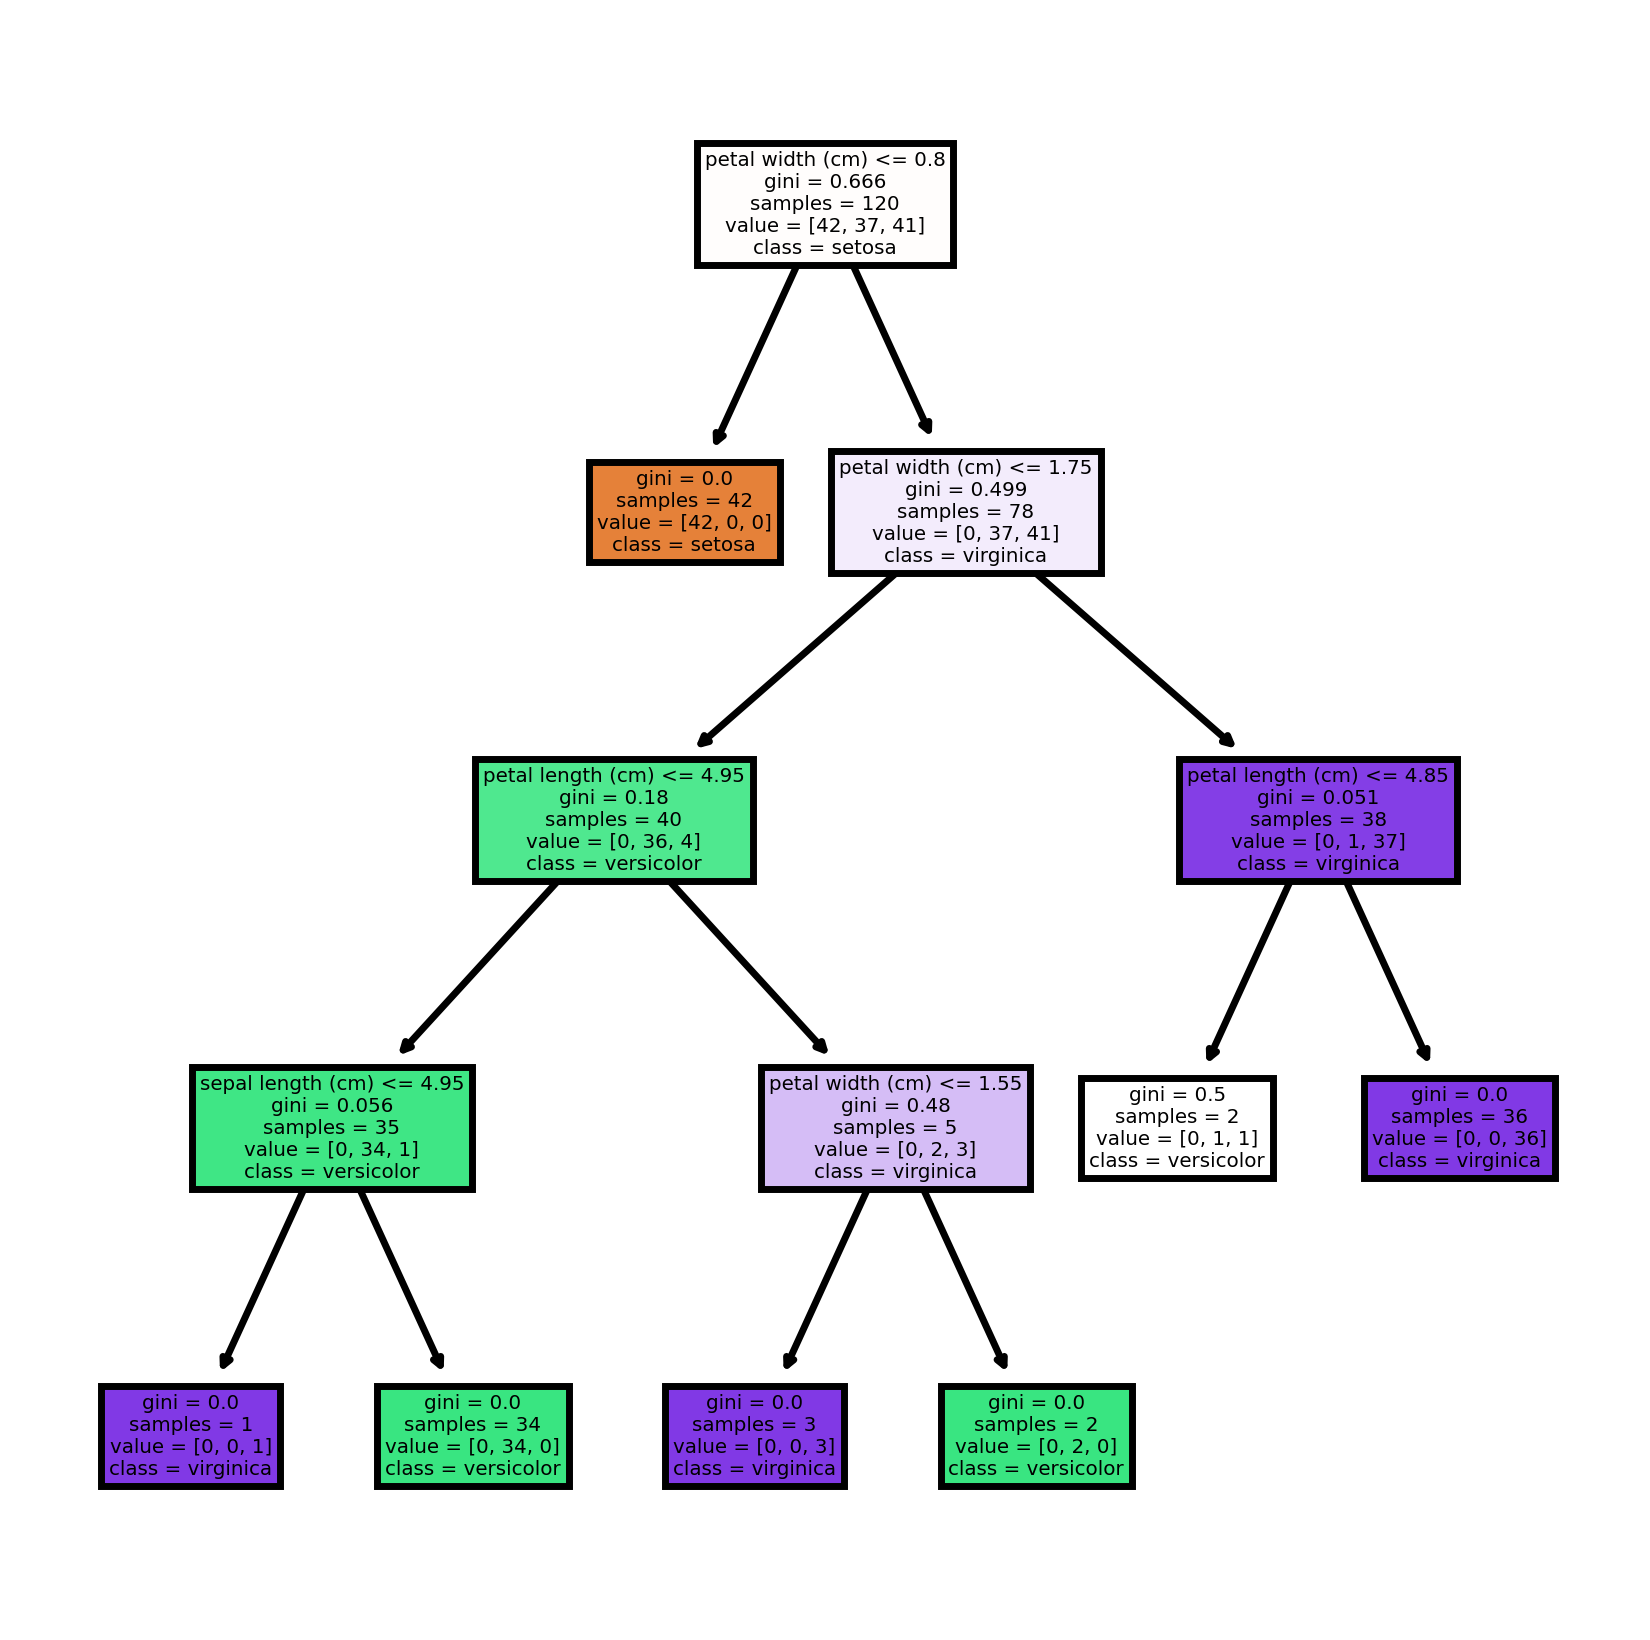

In [20]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.subplots(figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    14
0     8
2     8
dtype: int64

In [22]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.9

In [23]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.86      0.92      0.89        13
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### Building Decision Tree Classifier (CART) using entropyCriteria

In [24]:
p1=42/120
p2=37/120
p3=1-p1-p2
-p1*np.log2(p1) -p2*np.log2(p2) -p3*np.log2(p3)

1.5828344416558475

In [62]:
#gini= 1-p1^2 -p2^2 -p3^2  # 1-(1/n)

#entropy: -p1log2(p1) -p2log2(p2) -p3log2(p3)  # log2(n)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [64]:
y_train

0      0
143    2
72     1
116    2
20     0
      ..
85     1
128    2
119    2
133    2
140    2
Name: species, Length: 120, dtype: int32

In [65]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [66]:
#Prediction and computing the accuracy
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.9333333333333333

# Decision Tree Regression Example

In [67]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [68]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=1)

In [71]:
model = DecisionTreeRegressor(max_depth=3,min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [72]:
#Find the mse
from sklearn import metrics
pred=model.predict(X_test)
metrics.mean_squared_error(y_test,pred)

0.03921150254212944

In [73]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.1392255406795081

In [74]:
np.mean(np.abs(y_test-pred)/np.array(y_test))

0.1392255406795081

[Text(0.5, 0.875, 'X[2] <= 2.6\nsquared_error = 0.599\nsamples = 100\nvalue = 1.205'),
 Text(0.25, 0.625, 'X[0] <= 4.95\nsquared_error = 0.012\nsamples = 33\nvalue = 0.23'),
 Text(0.125, 0.375, 'X[1] <= 2.6\nsquared_error = 0.003\nsamples = 17\nvalue = 0.188'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.3'),
 Text(0.1875, 0.125, 'squared_error = 0.003\nsamples = 16\nvalue = 0.181'),
 Text(0.375, 0.375, 'X[2] <= 1.55\nsquared_error = 0.018\nsamples = 16\nvalue = 0.275'),
 Text(0.3125, 0.125, 'squared_error = 0.008\nsamples = 10\nvalue = 0.23'),
 Text(0.4375, 0.125, 'squared_error = 0.026\nsamples = 6\nvalue = 0.35'),
 Text(0.75, 0.625, 'X[2] <= 4.75\nsquared_error = 0.19\nsamples = 67\nvalue = 1.685'),
 Text(0.625, 0.375, 'X[2] <= 4.15\nsquared_error = 0.039\nsamples = 27\nvalue = 1.267'),
 Text(0.5625, 0.125, 'squared_error = 0.018\nsamples = 13\nvalue = 1.115'),
 Text(0.6875, 0.125, 'squared_error = 0.018\nsamples = 14\nvalue = 1.407'),
 Text(0.875, 0.375, 'X[1]

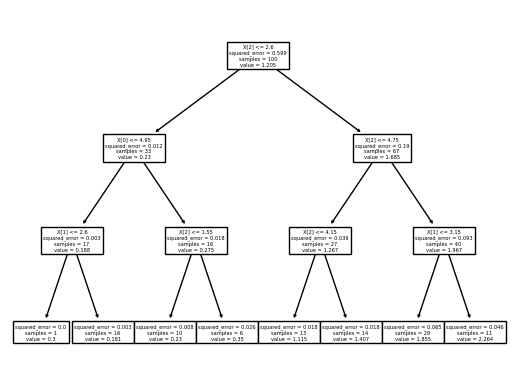

In [75]:
tree.plot_tree(model)

In [76]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)']
cn=['petal width (cm)']
fig, axes = plt.subplots(,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

SyntaxError: invalid syntax (380111715.py, line 3)

In [ ]:
import numpy as np
np.log(6)

In [ ]:
np.sqrt(6)